Nodes: 1690


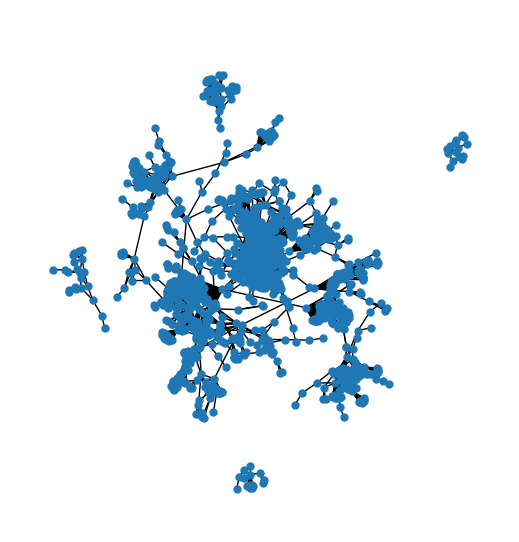

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd


# Load the graph from the edge list file
G = nx.read_weighted_edgelist('male_graph.edgelist')
print(f"Nodes: {len(G.nodes())}")
pos = nx.spring_layout(G, iterations=50, threshold=0.001)

# Plot the graph with node colors based on their clusters
plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_size=25)

# Add title and show the plot
plt.title("Graph Partitioned into Communities (Clusters)")
plt.show();

In [2]:
def plot_partition(method: str):
    # Load cluster data
    clustering = pd.read_csv(f'male_clusters_{method}.csv')

    # Create a dictionary to store node-to-cluster mapping
    node_to_cluster = dict(zip(clustering['vertex_id'], clustering['cluster_id']))

    # Get unique clusters and create a colormap
    n_unique_clusters = len(sorted(set(node_to_cluster.values())))
    colormap = sns.color_palette(palette="deep", n_colors=n_unique_clusters)

    # Create a list of colors based on clusters
    cluster_colors = [colormap[node_to_cluster[int(node)]] for node in G.nodes()]

    # Create a layout for the graph with more iterations for better positioning
    pos = nx.spring_layout(G, iterations=60, seed=42,  threshold=0.001)  # Increase iterations to improve the layout

    # Plot the graph with node colors based on their clusters
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_size=40, node_color=cluster_colors)
    plt.title(f"{method}", fontsize=40, color="black")
    plt.show();

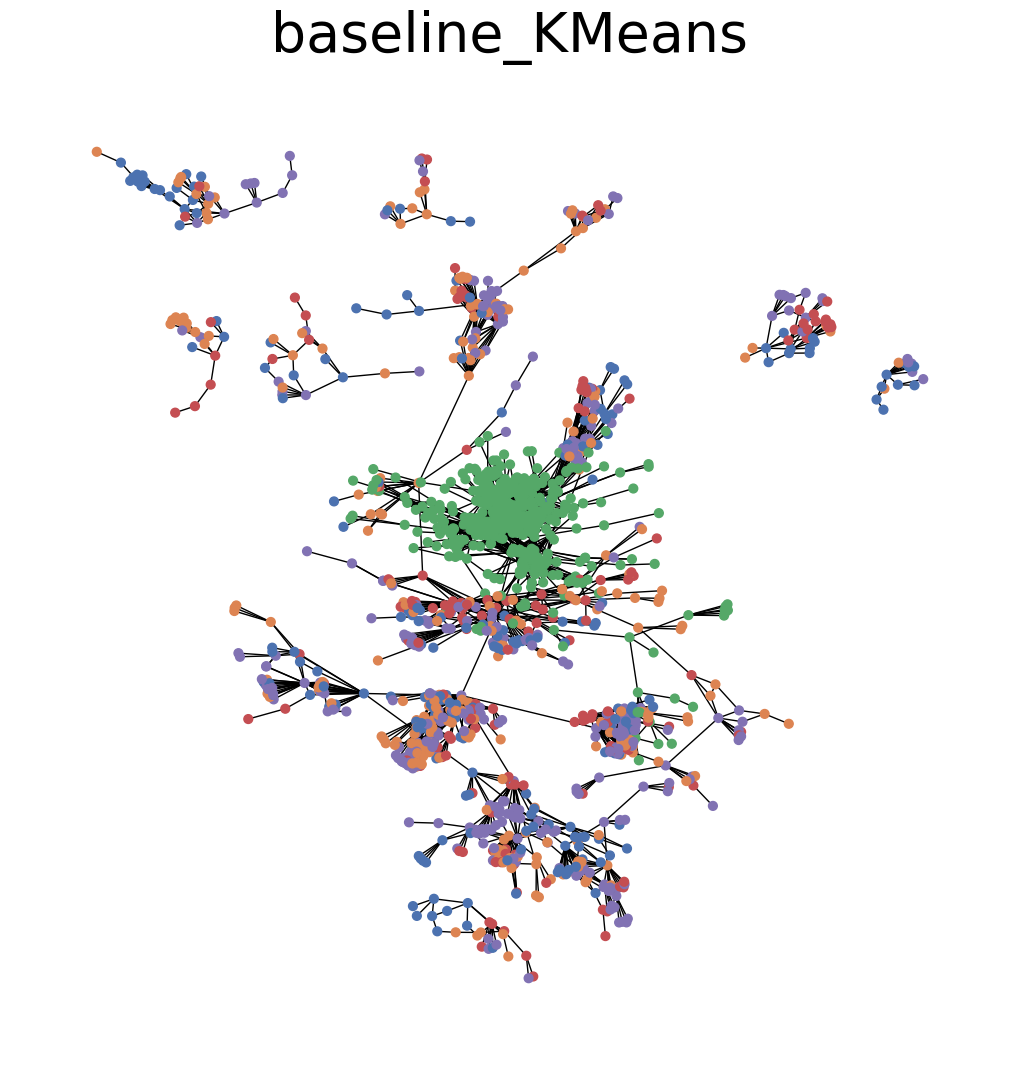

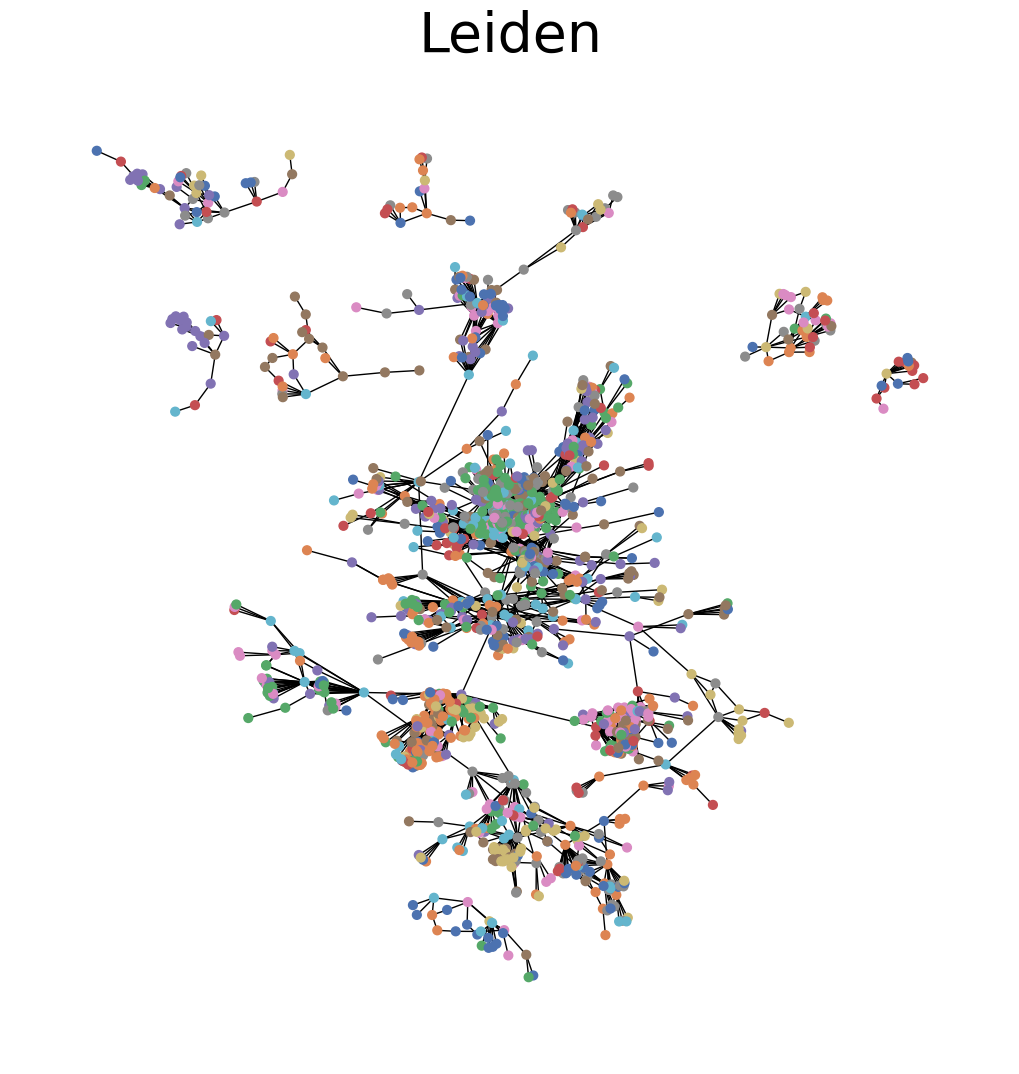

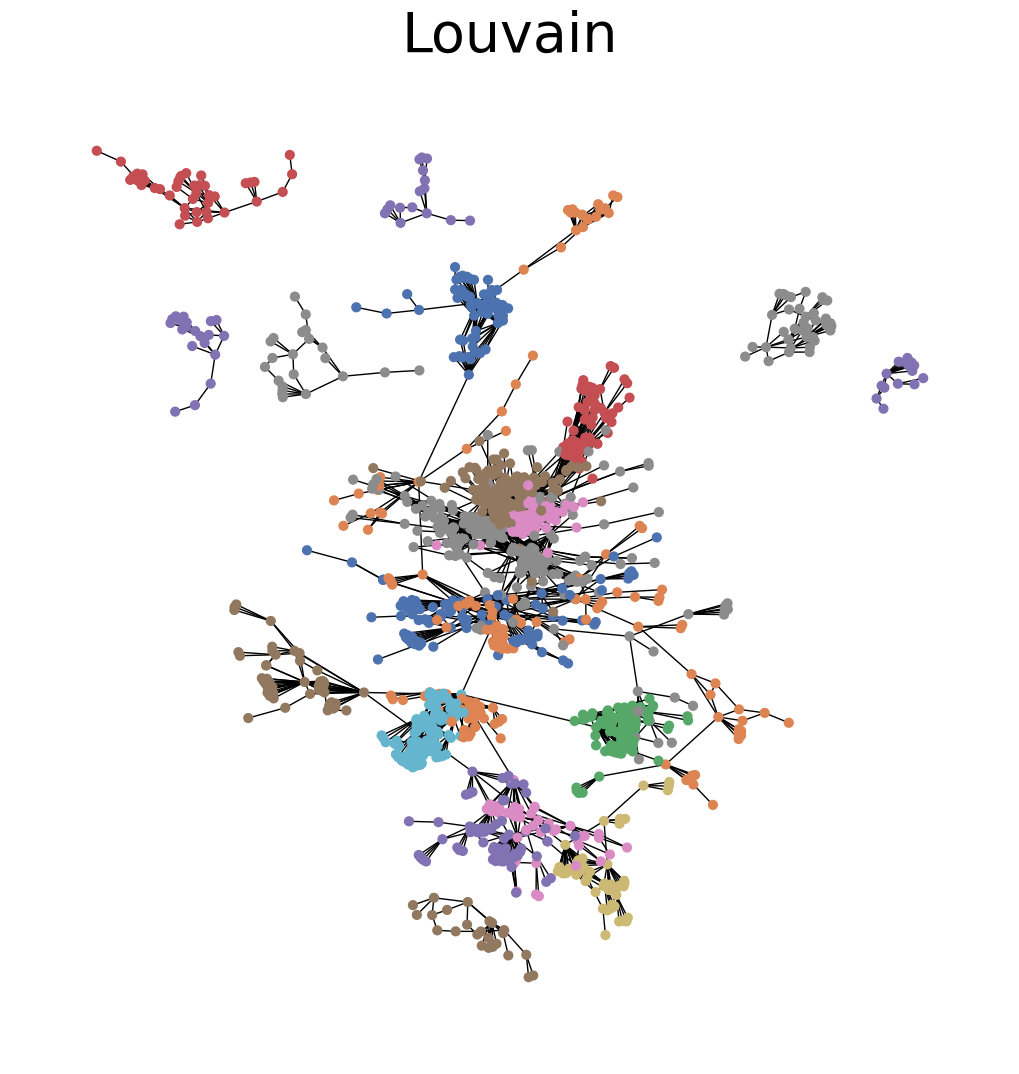

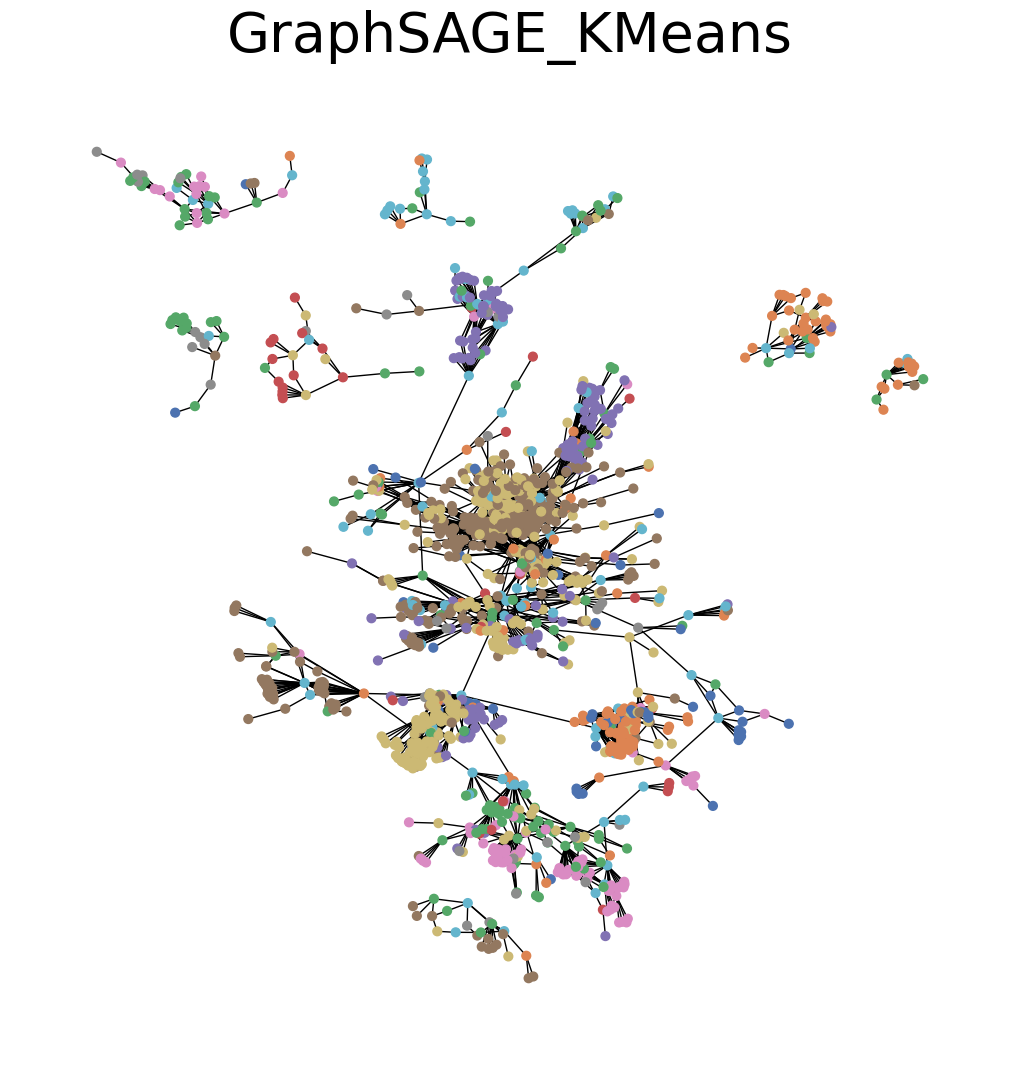

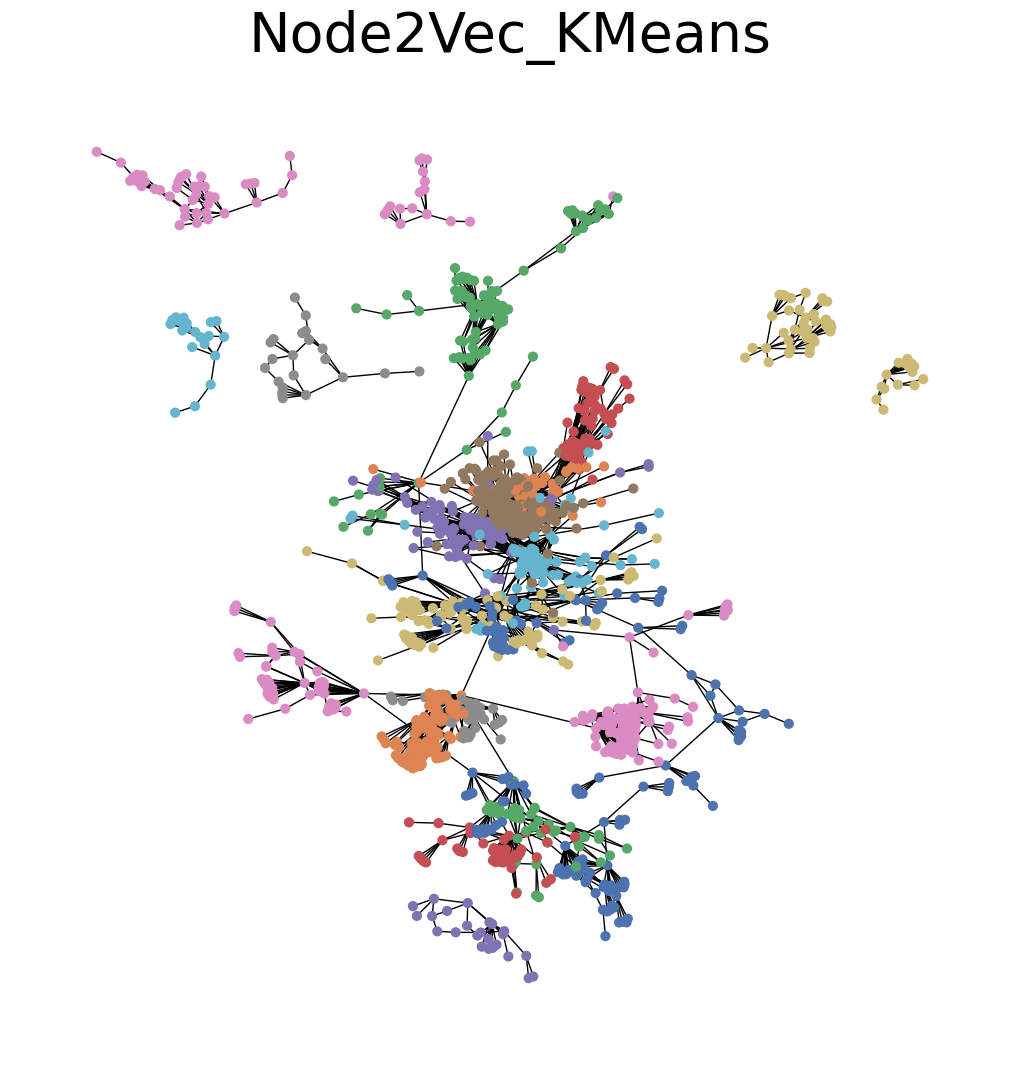

In [3]:
plot_partition(method="baseline_KMeans")
plot_partition(method="Leiden")
plot_partition(method="Louvain")
plot_partition(method="GraphSAGE_KMeans")
plot_partition(method="Node2Vec_KMeans")